# Outliers

- Outliers são pontos que fogem muitos desvios padrões da média.

## (RobustScaler)
 - RobustScaler é um normalizador menos sensível a outliers. Se baseia em mediana e distância interquartil (similar ao gráfico de boxplot). Geramente se utiliza esse método quando há presença de outliers que não devem ser removidos do conjunto de dados. Porém o RobustScaler não funciona muito bem com dados esparsos e/ou cheios de 0.

In [ ]:
# Importando bibliotecas
import pandas as pd

# Importando o método RobustScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
# Criando uma conjunto de dados com o pandas.DataFrame com vendas fictícias de laranja e suco de laranja

df = pd.DataFrame({
    'laranja': [100,180,90,120,150,110],
    'suco': [15,20,10,30,25,30]
})

df

,laranja,suco
0,100,15
1,180,20
2,90,10
3,120,30
4,150,25
5,110,30


In [ ]:
df['laranja']

0    100
1    180
2     90
3    120
4    150
5    110
Name: laranja, dtype: int64

In [ ]:
# Criando uma Series com os dados da coluna 'laranja' para adicionar um valor outlier

out = df['laranja'].copy()

In [ ]:
# Adicionando o valor de 500
out[5] = 500

In [ ]:
out

0    100
1    180
2     90
3    120
4    150
5    500
Name: laranja, dtype: int64

In [ ]:
out.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: laranja
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


In [ ]:
out.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   index    6 non-null      int64
 1   laranja  6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


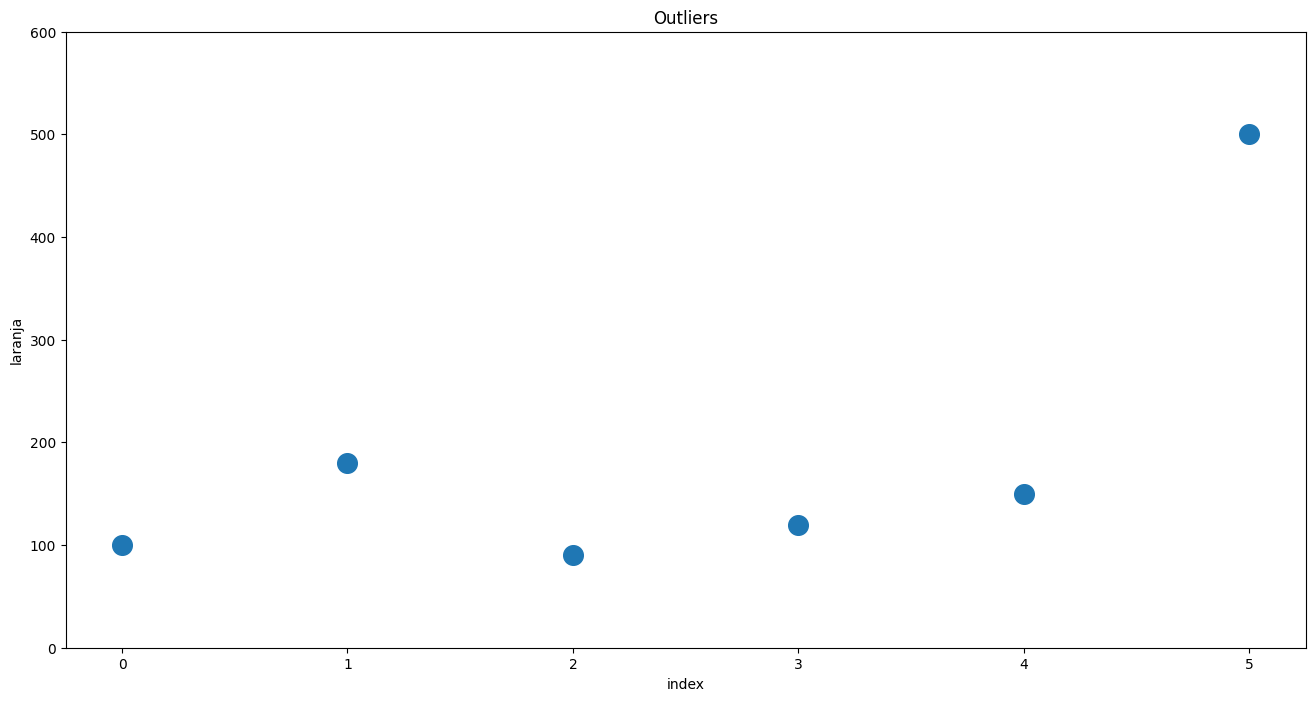

In [ ]:
# Plotando o DataFrame acima em um gráfico de dispersão para visualizarmos melhor outlier

out.reset_index().plot(
   kind='scatter',
   title='Outliers',
   x='index',
   y='laranja',
   s=200, # tamanho dos pontos,
   figsize=(16,8),  # tamanho da figura
   ylim=[0,600] # range da escala do eixo y
);

In [ ]:
# Comparando as informações estatísticas com e sem outlier
df['laranja'].describe()

count      6.00000
mean     125.00000
std       33.91165
min       90.00000
25%      102.50000
50%      115.00000
75%      142.50000
max      180.00000
Name: laranja, dtype: float64

In [ ]:
out.describe()

count      6.000000
mean     190.000000
std      155.434874
min       90.000000
25%      105.000000
50%      135.000000
75%      172.500000
max      500.000000
Name: laranja, dtype: float64

In [ ]:
# Pegando os valores dos quartis do conjunto de dados com outlier
Q1 = out.quantile(.25) # 1º quartio
Q2 = out.quantile(.50) # 2º quartio, mediana out.median()
Q3 = out.quantile(.75) # 3º quartio
IQR = Q3 - Q1 # intervalo entre quartis (IQR): é uma medida de variação que se baseia em dividir um conjunto de dados em quartis.

In [ ]:
Q1, Q2, Q3, IQR

(105.0, 135.0, 172.5, 67.5)

In [ ]:
# Pegando os valores dos quartis do conjuto de dados sem outlier
q1 = df['laranja'].quantile(.25)
q2 = df['laranja'].quantile(.50)
q3 = df['laranja'].quantile(.75)
iqr = q3-q1

In [ ]:
q1, q2, q3, iqr

(102.5, 115.0, 142.5, 40.0)

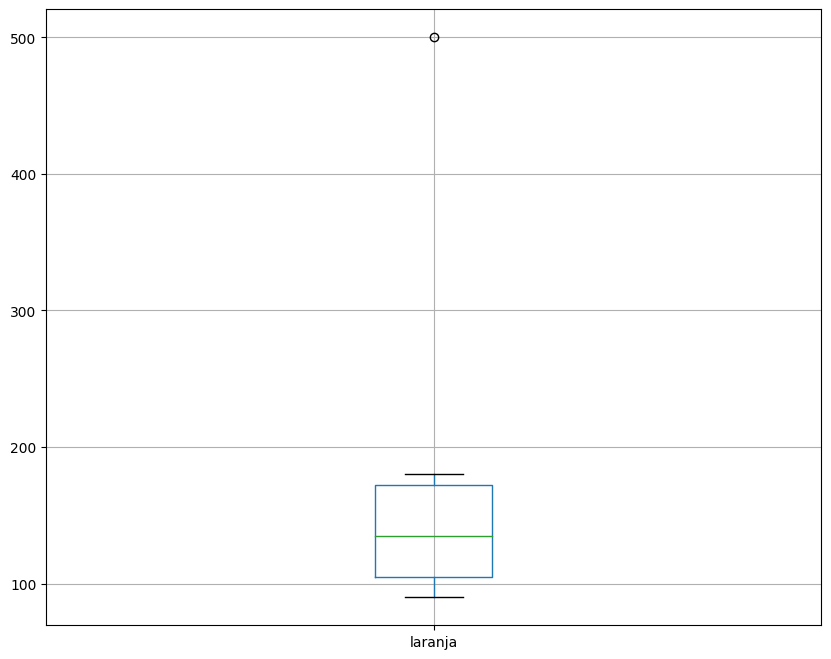

In [ ]:
# Plotando os dados com outlier em um gráfico de boxplot

out.to_frame().boxplot(
    figsize=(10,8)
); # é necessário passar a estrutura para um DataFrame para a geração correta do gráfico - to_frame()

In [ ]:
# Comparando a imagem acima com as informações geradas do método describe

out.describe()

count      6.000000
mean     190.000000
std      155.434874
min       90.000000
25%      105.000000
50%      135.000000
75%      172.500000
max      500.000000
Name: laranja, dtype: float64

In [ ]:
# Definindo uma variável com o método acima
robusto = RobustScaler()
robusto

RobustScaler()

In [ ]:
# Treinando o modelo
robusto.fit(out.to_frame())

RobustScaler()

In [ ]:
# Fazendo a transformação nos dados da variável out
robusto.transform(out.to_frame())

array([[-0.51851852],
       [ 0.66666667],
       [-0.66666667],
       [-0.22222222],
       [ 0.22222222],
       [ 5.40740741]])

In [ ]:
pd.concat([
    df['laranja'],
    out
], axis=1)

,laranja,laranja
0,100,100
1,180,180
2,90,90
3,120,120
4,150,150
5,110,500


In [ ]:
# Fazendo a transformação dos dados do DataFrame sem outliers
robusto.fit(df['laranja'].to_frame())
robusto.transform(df['laranja'].to_frame())

array([[-0.375],
       [ 1.625],
       [-0.625],
       [ 0.125],
       [ 0.875],
       [-0.125]])